In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib
plt.rcParams["font.sans-serif"]=["SimHei"]
plt.rcParams["axes.unicode_minus"]=False

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [123]:
#from IPython.display import display
df=pd.read_csv(r"D:\波士顿房价\housing_data.csv")
df[:5]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,piratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [125]:
columns=["crim","zn","indus","chas","nox","rm","age","dis","red","tax","ptpatio","b","lstat","medv"]
# 创建DataFrame
data=pd.DataFrame(df.values,columns=columns)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,red,tax,ptpatio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [39]:
# 查看数据基本信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    float64
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   red      506 non-null    float64
 9   tax      506 non-null    float64
 10  ptpatio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [41]:
# 统计分析数据，初步识别异常数据
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,red,tax,ptpatio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


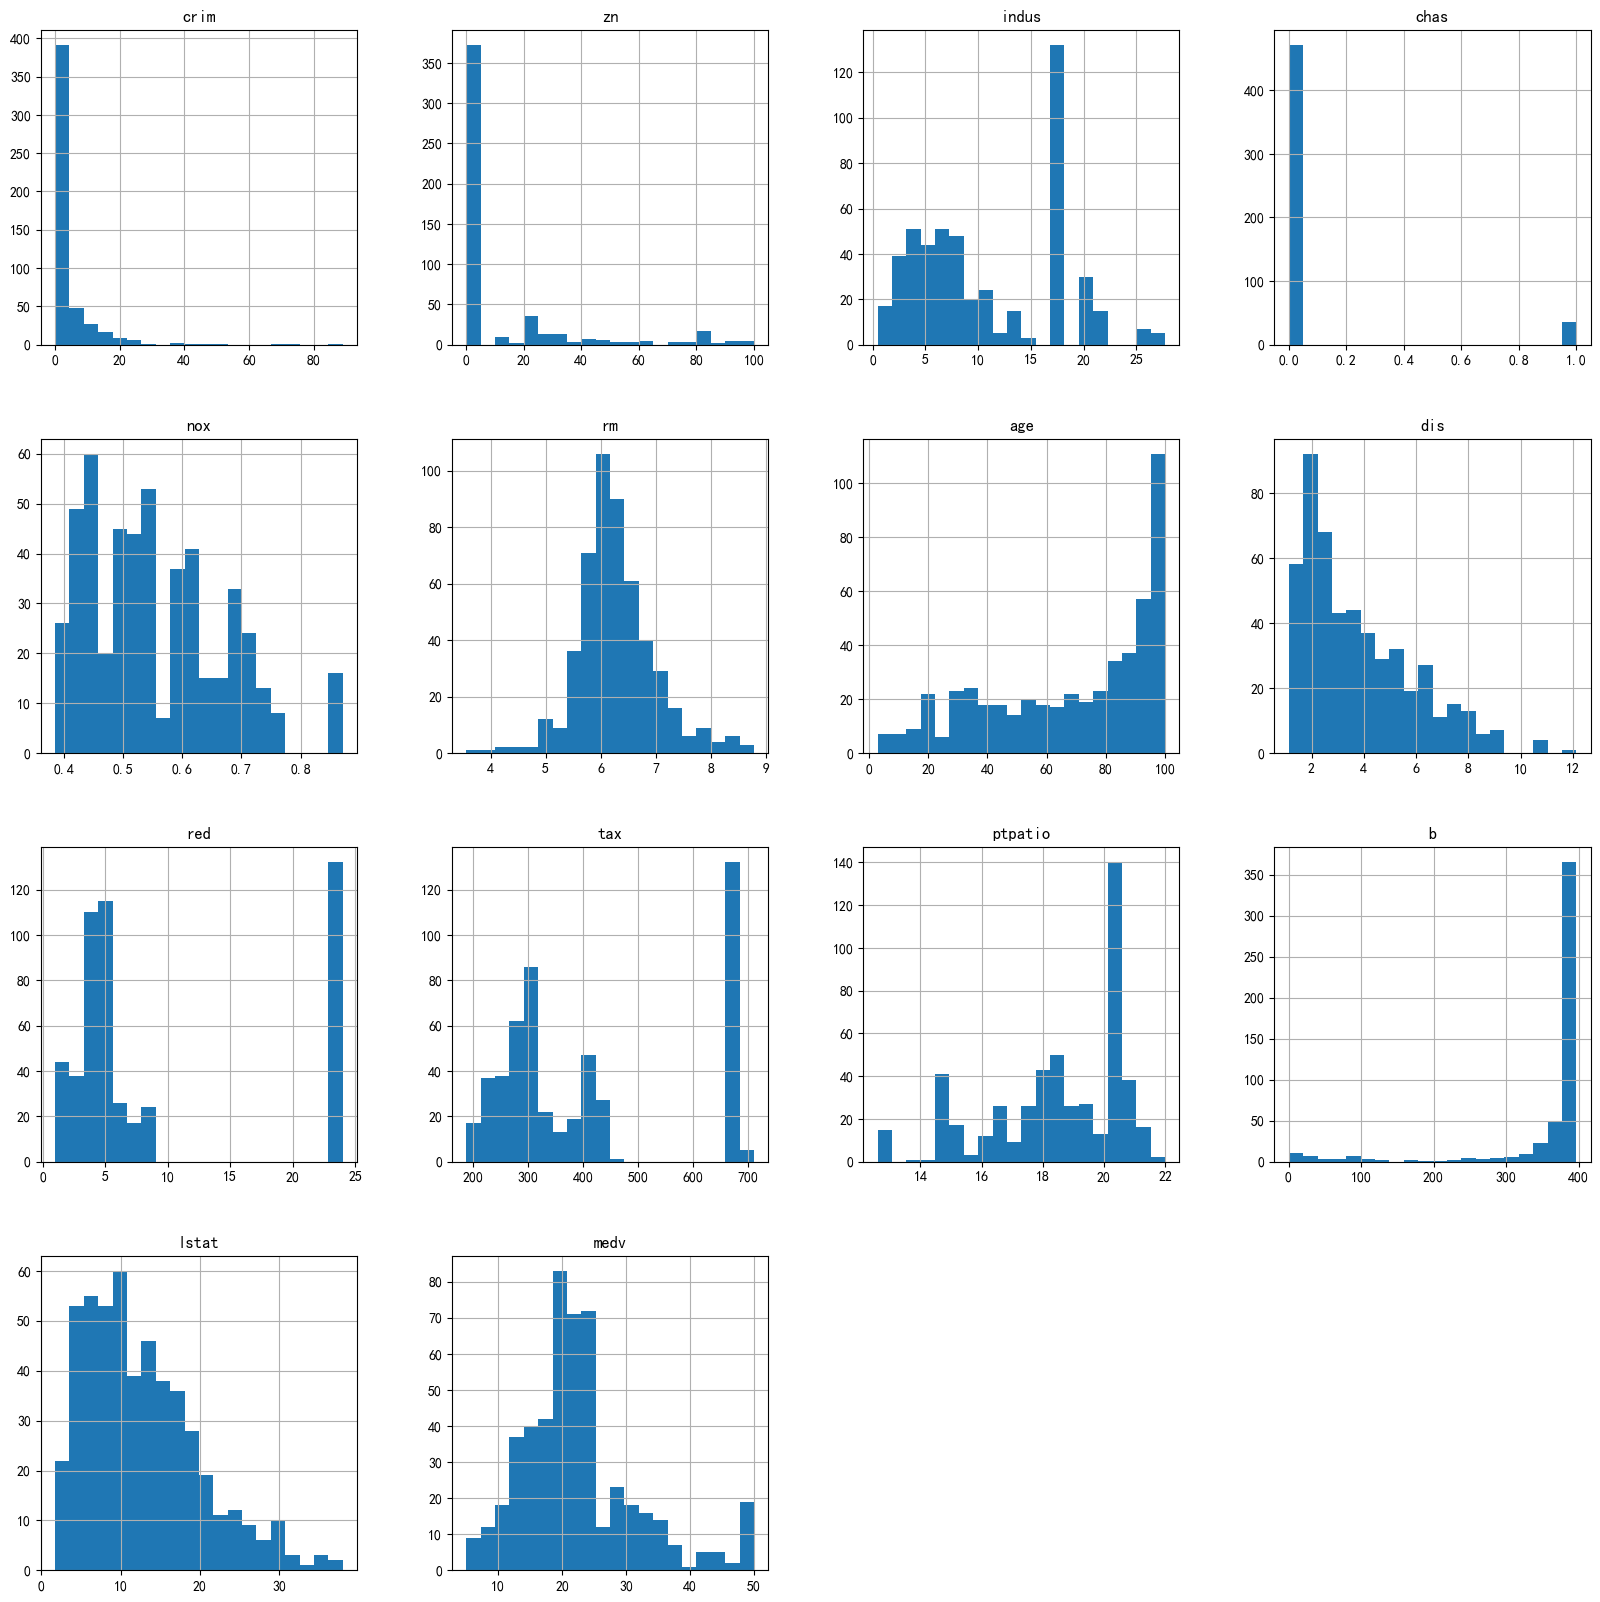

In [127]:
# 绘图
data.hist(bins=20,figsize=(20,20))
plt.show()

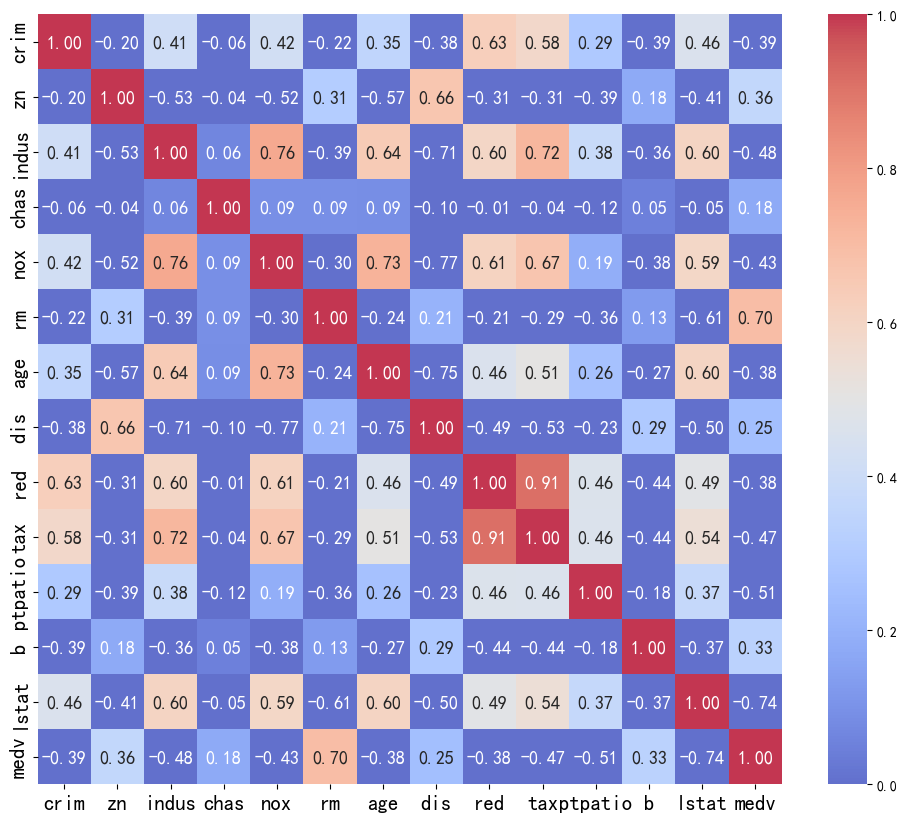

In [129]:
# 计算相关矩阵并可视化
import seaborn as sns
corr=data.corr()
fig=plt.figure(figsize=(12,10))
ax=fig.add_subplot(111)
ax=sns.heatmap(corr,vmax=1,vmin=0,annot=True,fmt=".2f",cmap="coolwarm",annot_kws={"size":13,"weight":"bold"},alpha=0.8)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

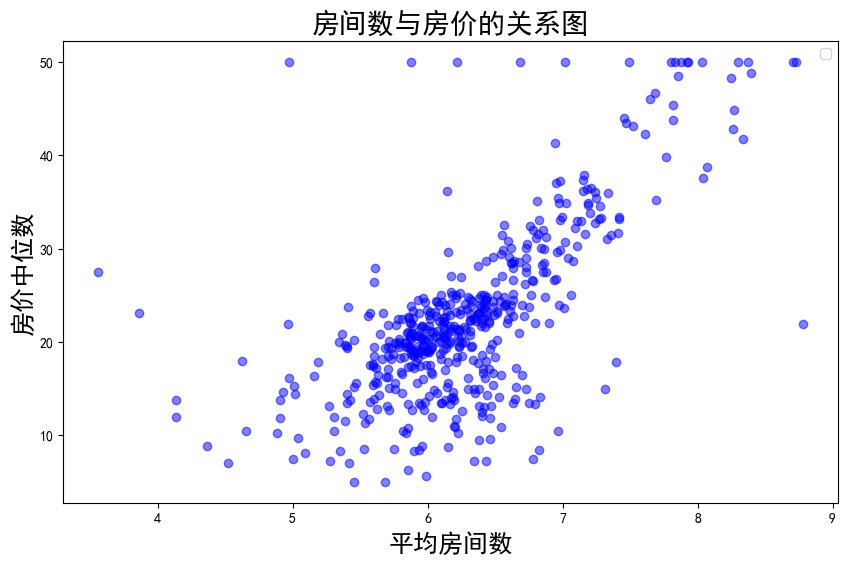

In [131]:
# 可视化上图筛选的相关因素与房价的关系
# 分析rm(房间数)与房价的关系
x=df["rm"]
y=df["medv"]
plt.figure(figsize=(10,6))
plt.scatter(x,y,color="b",marker="o",alpha=0.5)
plt.legend()
plt.title("房间数与房价的关系图",fontsize=20)
plt.xlabel("平均房间数",fontsize=18)
plt.ylabel("房价中位数",fontsize=18)
plt.show()

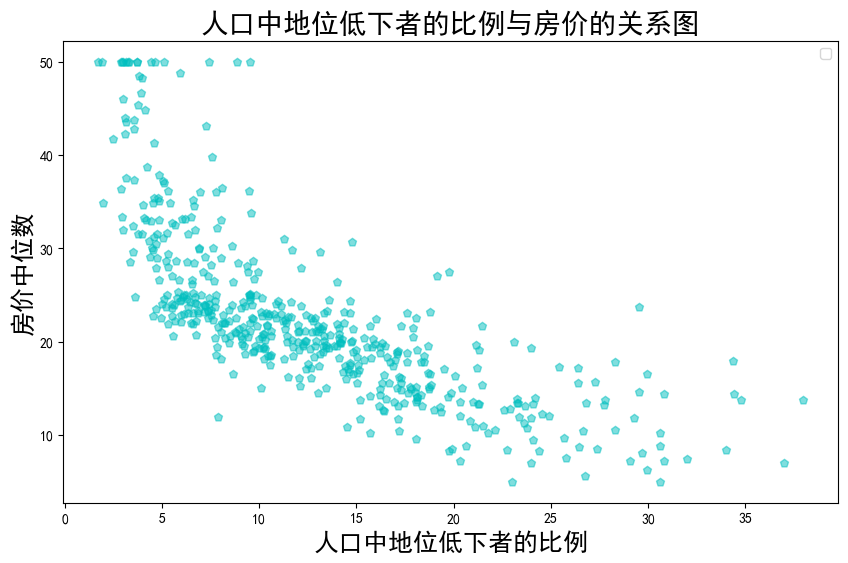

In [133]:
# 分析lstat(人口中地位低下者的比例)与房价的关系
x=df["lstat"]
y=df["medv"]
plt.figure(figsize=(10,6))
plt.scatter(x,y,color="c",marker="p",alpha=0.5)
plt.legend()
plt.title("人口中地位低下者的比例与房价的关系图",fontsize=20)
plt.xlabel("人口中地位低下者的比例",fontsize=18)
plt.ylabel("房价中位数",fontsize=18)
plt.show()

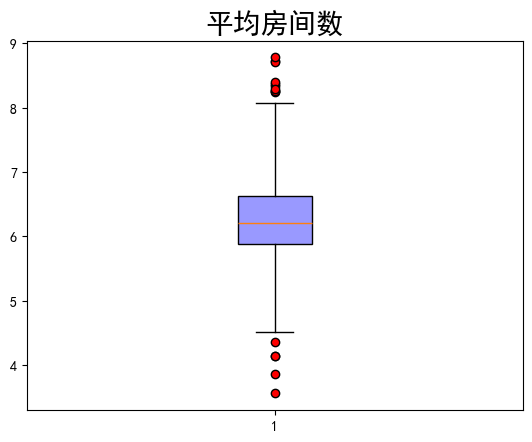

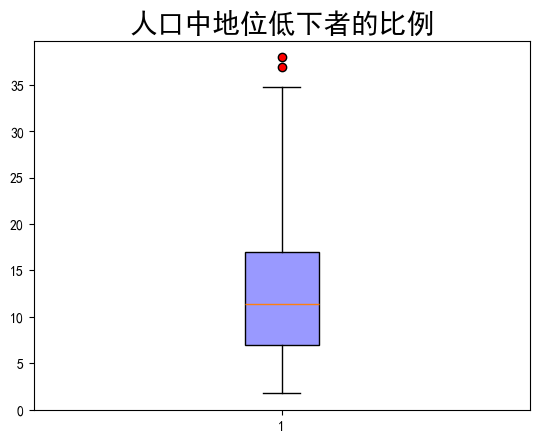

In [143]:
# 异常值识别及处理
# rm
plt.boxplot(data["rm"],whis=2,flierprops={"marker":"o","markerfacecolor":"r","color":"k"},
           patch_artist=True,boxprops={"color":"k","facecolor":"#9999ff"})
plt.title("平均房间数",fontsize=20)
plt.show()
# lstat
plt.boxplot(data["lstat"],whis=2,flierprops={"marker":"o","markerfacecolor":"r","color":"k"},
           patch_artist=True,boxprops={"color":"k","facecolor":"#9999ff"})
plt.title("人口中地位低下者的比例",fontsize=20)
plt.show()

In [ ]:
# 剔除异常值
data.loc[data["rm"]>8,"rm"]= 8

In [161]:
X

,crim,zn,indus,chas,nox,rm,age,dis,red,tax,ptpatio,b,lstat
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [173]:
y_pred

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
      

Epoch 0, Loss: 594.2592
Epoch 200, Loss: 22.0267
Epoch 400, Loss: 21.9523
Epoch 600, Loss: 21.9422
Epoch 800, Loss: 21.9403
Epoch 1000, Loss: 21.9399
Epoch 1200, Loss: 21.9397
Epoch 1400, Loss: 21.9397
Epoch 1600, Loss: 21.9397
Epoch 1800, Loss: 21.9397


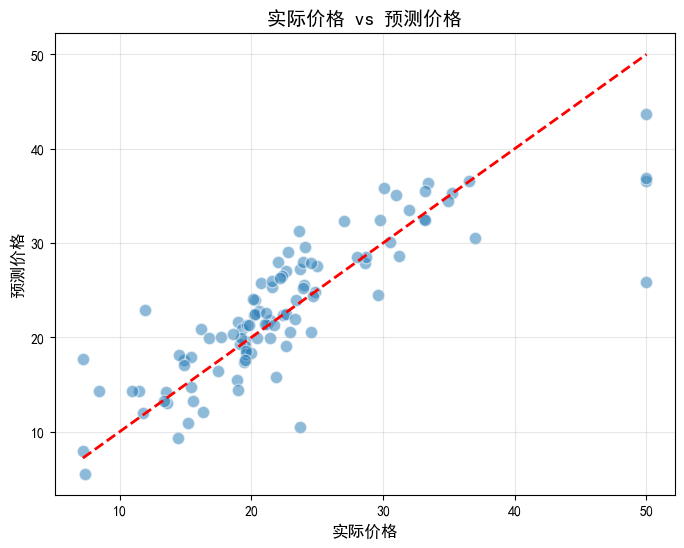

In [177]:
# 线性回归模型预测房价
# 提取特征和目标变量
X = data.drop(columns="medv", axis=1)  # 确保已排除目标变量
y = data["medv"]

# 数据分割
np.random.seed(42)
indices = np.random.permutation(X.shape[0])
train_size = int(0.8 * X.shape[0])

X_train_raw = X.iloc[indices[:train_size]]  # 原始训练集
X_test_raw = X.iloc[indices[train_size:]]   # 原始测试集
y_train = y.iloc[indices[:train_size]]
y_test = y.iloc[indices[train_size:]]

# 标准化处理
def standardize(X_train, X_test):
    mean = X_train.mean(axis=0)
    std = X_train.std(axis=0) + 1e-8
    X_train_scaled = (X_train - mean) / std
    X_test_scaled = (X_test - mean) / std
    return X_train_scaled, X_test_scaled

X_train, X_test = standardize(X_train_raw, X_test_raw)  # 使用训练集统计量

# 添加偏置项
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

# 模型类
class LinearRegression:
    def __init__(self):
        self.weights = None

    def fit(self, X, y, learning_rate=0.01, epochs=2000):
        self.weights = np.zeros((X.shape[1], 1))
        y = y.reshape(-1, 1)  # 确保维度

        for epoch in range(epochs):
            y_pred = X @ self.weights
            gradient = (1/X.shape[0]) * X.T @ (y_pred - y)
            
            # 学习率衰减
            current_lr = learning_rate / (1 + 0.001*epoch)
            self.weights -= current_lr * gradient

            if epoch % 200 == 0:
                loss = np.mean((y_pred - y)**2)
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def predict(self, X):
        return X @ self.weights

# 训练与评估
model = LinearRegression()
model.fit(X_train, y_train.values, learning_rate=0.1, epochs=2000)

y_pred = model.predict(X_test)

# 可视化
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='w', s=80)
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         'r--', lw=2)
plt.xlabel("实际价格", fontsize=12)
plt.ylabel("预测价格", fontsize=12)
plt.title("实际价格 vs 预测价格", fontsize=14)
plt.grid(alpha=0.3)
plt.show()